In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '/n/holyscratch01/wadduwage_lab/D2NN_QPM_classification/datasets/bacteria_np/'

In [3]:
data_dir = path

In [4]:
lis = {}

for k in ['train','val','test']:
    
    print(f"{k} ")
    folders = sorted(os.listdir(path + k), key=lambda x: int(x))
    
    # folders = os.listdir(path + k)
    
    lis[k] = []
    for folder in folders:
        print(f"   {folder}", end=" ")
        files = os.listdir(path + '/' + k + '/' + folder)
        #count += len(files)


        
        lis[k].append(len(files))
        
        print(f" {len(files)} ")

train 
   0  12480 
   1  11228 
   2  13343 
   3  15493 
   4  24912 
   5  11164 
   6  16239 
   7  23151 
   8  15432 
   9  17076 
   10  10744 
   11  7808 
   12  27857 
   13  21111 
   14  18246 
   15  29990 
   16  24910 
   17  17706 
   18  18648 
   19  16452 
   20  21453 
val 
   0  1560 
   1  1403 
   2  1668 
   3  1937 
   4  3114 
   5  1396 
   6  2030 
   7  2894 
   8  1929 
   9  2135 
   10  1343 
   11  976 
   12  3482 
   13  2639 
   14  2281 
   15  4640 
   16  3853 
   17  2213 
   18  2331 
   19  2056 
   20  2682 
test 
   0  1561 
   1  1404 
   2  1668 
   3  1937 
   4  3114 
   5  1396 
   6  2030 
   7  2894 
   8  1929 
   9  2135 
   10  1343 
   11  976 
   12  3483 
   13  2639 
   14  2281 
   15  4861 
   16  3854 
   17  2214 
   18  2332 
   19  2057 
   20  2682 


In [5]:
375443*0.15

56316.45

In [6]:
48790*0.15

7318.5

In [7]:
lis['train']

[12480,
 11228,
 13343,
 15493,
 24912,
 11164,
 16239,
 23151,
 15432,
 17076,
 10744,
 7808,
 27857,
 21111,
 18246,
 29990,
 24910,
 17706,
 18648,
 16452,
 21453]

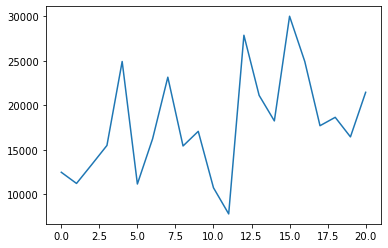

In [8]:
plt.plot(lis['train'])

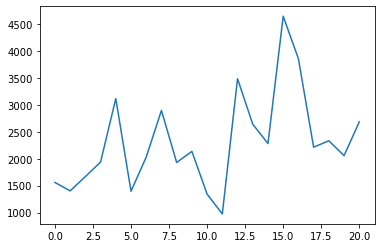

In [9]:
plt.plot(lis['val'])

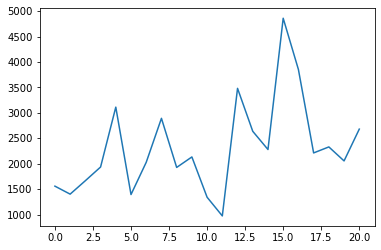

In [10]:
plt.plot(lis['test'])

In [ ]:
image = np.load('/n/holyscratch01/wadduwage_lab/D2NN_QPM_classification/datasets/bacteria_np/train/16/16_34.npy',allow_pickle=True)

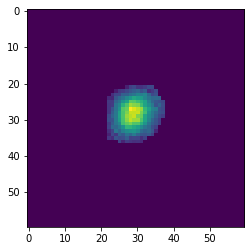

In [8]:
plt.imshow(image[0])

In [9]:
image[1][0]

8

In [2]:
import glob

In [64]:
type_ = 'val'

In [65]:
img_dirs = sorted(glob.glob(f'{data_dir}/{type_}/*/*'), key= lambda x: int(x.split('/')[-1][:-4]))

In [66]:
dirs = {}

for i,x in enumerate(img_dirs):
    
    class_ = int(x.split('/')[-2])
    
    if(class_ in dirs.keys()):
        dirs[class_].append(x)
    else:
        dirs[class_] = [x]

        
img_dirs_filtered = []

for i in range(0,21):
    count = len(dirs[i])
    img_dirs_filtered.append(dirs[i][:int(count*0.05)])
    
flat_list = [item for sublist in img_dirs_filtered for item in sublist]


In [67]:
len(flat_list)

2418

In [1]:

from modules.helpers import *
from modules.datasets import *
from modules.dataloaders import *

In [ ]:
dataloaders = {}
dataloaders['train'], dataloaders['val'], dataloaders['test'] =  get_bacteria_dataloaders(64, 16 ,10, "strain", balanced_mode = True)


Using balanced mode
Dataset type train label type: strain -> 

In [ ]:
cat = [0]*21

for i, (inputs, labels) in enumerate(dataloaders['test']):
    
    for k in labels:
        cat[k] += 1


In [ ]:
cat

In [ ]:
np.sum(np.array(cat))

### Save class types in a single .npy array

In [3]:
import glob
data_dir = '/n/holyscratch01/wadduwage_lab/D2NN_QPM_classification/datasets/bacteria_np'
type_ = 'test'

all_dirs = sorted(glob.glob(f'{data_dir}/{type_}/*/*'), key= lambda x: int(x.split('/')[-1][:-4]))

In [4]:
print(f"Dataset type {type_}", end = " -> ")
print(f"All files = {len(all_dirs)}")

Dataset type test -> All files = 48790


In [5]:
species_mapping_dict  = {
    0: 0,
    1: 1,
    2: 2,
    3: 4,
    4: 2,
    5: 2,
    6: 2,
    7: 3,
    8: 4,
    9: 2,
    10: 2,
    11: 2,
    12: 3,
    13: 3,
    14: 3,
    15: 3,
    16: 0,
    17: 0,
    18: 0,
    19: 0,
    20: 0,
}

In [6]:
def __getclass_(meta_data, label_type):
    if(label_type == 'class'):
        return meta_data[0]

    elif(label_type == 'antibiotic_resistant'):
        '''
            Dataset wild_type equals to class 1

            antibiotic_resistance is when class is => not wild_type
        '''
        antibiotic_resistance = int(not(meta_data[1]))
        return antibiotic_resistance

    elif(label_type == 'gram_strain'):
        return meta_data[2]

    elif(label_type == 'species'):
        return species_mapping_dict[meta_data[0]] #map class to species

    elif(label_type == 'all'):
        antibiotic_resistance = int(not(meta_data[1]))
        
        return {'class' : meta_data[0], 'antibiotic_resistant' : antibiotic_resistance, 
                'gram_strain' : meta_data[2],
                'species' : species_mapping_dict[meta_data[0]] }
    else:
        raise Exception("Invalid label type")

In [7]:
global_dict = {}

img_dirs_filtered = []

for i,x in enumerate(all_dirs):

    data  = np.load(x, allow_pickle=True)[1]
    metadata = __getclass_(data, 'all')

    global_dict[x.split('/')[-1]] = metadata


    if(i % 10000 == 0):
        print(i)


0
10000
20000
30000
40000


In [ ]:

self.img_dirs = img_dirs_filtered

print(f"Loaded {len(self.img_dirs)} images only from class {isolate_class}")

In [8]:
global_dict['0_15472.npy']['class']

0

In [10]:
# import pickle
# with open('saved_dictionary.pkl', 'wb') as f:
#     pickle.dump(global_dict, f)

In [11]:
!pwd

/n/home12/ramith/FYP/bacteria-classification
